## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 1, 1, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2500)           │     2,562,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 54)             │       135,054 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,012,728 (103.05 MB)

 Trainable params: 9,004,242 (34.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,008,486 (68.70 MB)

### Visualizaing Single Image of Test Set

In [4]:
!pip install opencv-python

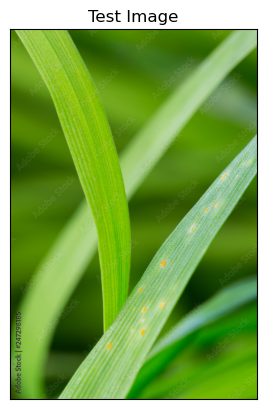

In [6]:
import cv2
image_path = "test\wheat comm.jpg"
#REading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR to RGB



#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image into batch
print(input_arr.shape)

(1, 128, 128, 3)


In [8]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


(array([[1.7444476e-08, 1.1578529e-09, 1.6856118e-08, 1.2525901e-08,
         5.2213315e-03, 4.3287110e-02, 1.0167845e-02, 1.7534920e-07,
         3.7851404e-08, 2.7246611e-07, 1.4784555e-05, 5.5021459e-09,
         9.3857282e-01, 3.5613840e-07, 5.5895271e-09, 1.7256507e-08,
         1.0291526e-08, 5.4242975e-09, 4.9267069e-04, 7.9899962e-04,
         2.1340222e-08, 2.6867675e-10, 6.9168334e-07, 4.0996142e-06,
         8.8395319e-10, 1.0894265e-07, 6.1110086e-09, 9.3660226e-08,
         2.3104106e-07, 2.2607890e-07, 4.4411227e-08, 3.4564874e-08,
         5.6558525e-07, 7.6374254e-06, 4.3176730e-08, 3.6789581e-05,
         5.7887537e-06, 8.8962124e-06, 2.0583893e-07, 2.1126843e-05,
         1.1055852e-06, 1.5281372e-05, 1.0060799e-07, 2.0185582e-06,
         4.2084295e-08, 4.9694684e-08, 1.8501935e-06, 3.8829882e-08,
         1.9092890e-04, 4.6103708e-08, 7.0373051e-07, 1.3343153e-04,
         9.4447279e-07, 1.0103963e-03]], dtype=float32),
 (1, 54))

In [9]:
result_index = np.argmax(prediction)
result_index

12

In [10]:
class_name =['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Bean___angular_leaf_spot',
 'Bean___rust',
 'Beans___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Invalid',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_Blight',
 'Potato___Healthy',
 'Potato___Late_Blight',
 'Raspberry___healthy',
 'Rice___Brown_Spot',
 'Rice___Healthy',
 'Rice___Hispa',
 'Rice___Leaf_Blast',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Sugarcane___Healthy',
 'Sugarcane___Mosaic',
 'Sugarcane___RedRot',
 'Sugarcane___Rust',
 'Sugarcane___Yellow',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy',
 'Wheat___Brown_Rust',
 'Wheat___Healthy',
 'Wheat___Yellow_Rust']

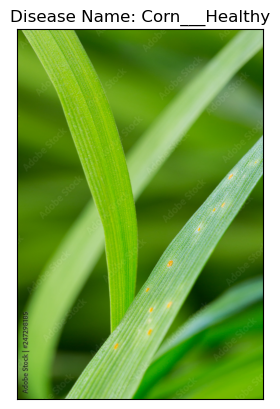

In [11]:
# Displaying result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
model_prediction

'Corn___Healthy'